## Case

### Objective

This type of data set requires customer segmentation to understand the customers beheviour to help a credit card company.

### Customer Segmentation

Customer segmentation is the process of segmenting a customer group into smaller groups in order to obtain a clear understanding of their unique needs and expectations. Customer segmentation is a method of analyzing the customer group in terms of differences and similarities within a customer group. These factors help you in offering tailor-made products or services to them and improve the retention rate of your existing customers as well.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as offline
offline.init_notebook_mode()

import warnings
warnings.filterwarnings("ignore")

Output hidden; open in https://colab.research.google.com to view.

## Loading the dataset

In [2]:
df = pd.read_csv("/content/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
#convert name of columns

df.columns = [i.title() for i in df.columns]
df.columns

Index(['Country', 'Child_Mort', 'Exports', 'Health', 'Imports', 'Income',
       'Inflation', 'Life_Expec', 'Total_Fer', 'Gdpp'],
      dtype='object')

## Data preprocessing and EDA

In [5]:
print("Shape of data: {}".format(df.shape))
print("Number of rows: {}".format(df.shape[0]))
print("Number of columns: {}".format(df.shape[1]))

Shape of data: (167, 10)
Number of rows: 167
Number of columns: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   Child_Mort  167 non-null    float64
 2   Exports     167 non-null    float64
 3   Health      167 non-null    float64
 4   Imports     167 non-null    float64
 5   Income      167 non-null    int64  
 6   Inflation   167 non-null    float64
 7   Life_Expec  167 non-null    float64
 8   Total_Fer   167 non-null    float64
 9   Gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,167,167,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Child_Mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
Exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
Health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
Imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
Income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
Inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
Life_Expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
Total_Fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
Gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


In [8]:
print("Duplicate values in df are:", df.duplicated().sum())

Duplicate values in df are: 0


In [9]:
df.isnull().sum()

Country       0
Child_Mort    0
Exports       0
Health        0
Imports       0
Income        0
Inflation     0
Life_Expec    0
Total_Fer     0
Gdpp          0
dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1.head()

,Country,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,Gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
df1.dropna(inplace=True)

In [14]:
df1.isnull().sum()

Country       0
Child_Mort    0
Exports       0
Health        0
Imports       0
Income        0
Inflation     0
Life_Expec    0
Total_Fer     0
Gdpp          0
dtype: int64

In [23]:
df1.drop(['Country'], axis = 1, inplace = True)

In [24]:
df1.columns

Index(['Child_Mort', 'Exports', 'Health', 'Imports', 'Income', 'Inflation',
       'Life_Expec', 'Total_Fer', 'Gdpp'],
      dtype='object')

In [25]:
print("Shape of data: {}".format(df1.shape))
print("Number of rows: {}".format(df1.shape[0]))
print("Number of columns: {}".format(df1.shape[1]))

Shape of data: (167, 9)
Number of rows: 167
Number of columns: 9


In [18]:
#print(df1['Tenure'].unique())

In [19]:
#df1.Tenure.value_counts()

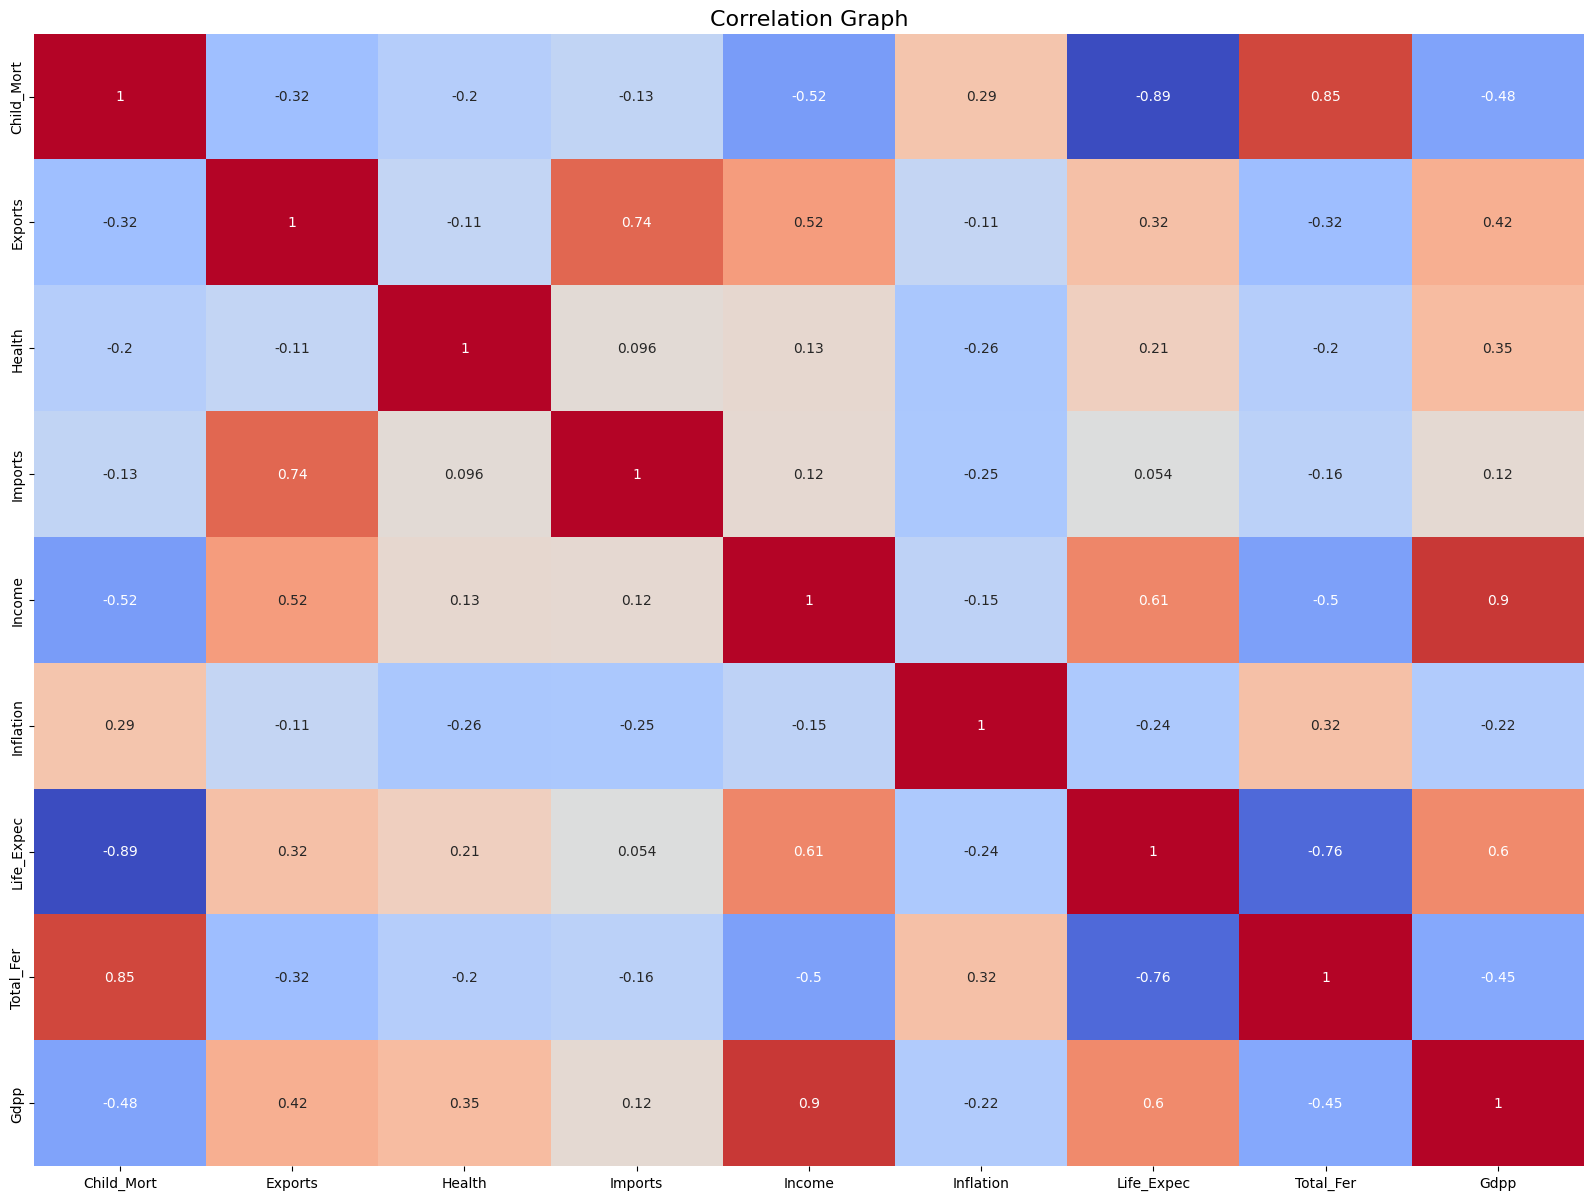

In [26]:
plt.figure (figsize = [20,15] ,  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 16)
sns.heatmap (df1.corr(), annot = True, cmap = 'coolwarm', cbar = False)
plt.show ()

## Normalization

In [27]:
df1.head()

,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,Gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)
scaled_features

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [29]:
type(scaled_features)

numpy.ndarray

## KMeans Clustering

In [30]:
from sklearn.cluster import KMeans

kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

List = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_set)
  kmeans.fit(scaled_features)
  List.append(kmeans.inertia_)

In [31]:
List

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.7033258497506,
 632.1597240151268,
 576.6124805392258,
 512.0708645395823,
 477.32395730585233,
 451.22113431424646,
 408.46044740374475]

### Elbow Method

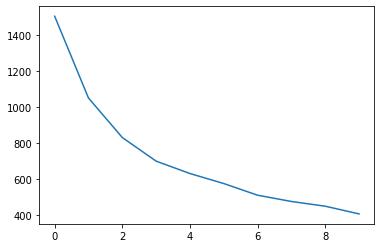

In [32]:
plt.plot(List)

In [34]:
#!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from kneed import KneeLocator
k1 = KneeLocator(range (1, 11), List, curve = "convex", direction = "decreasing")
k1.elbow

4

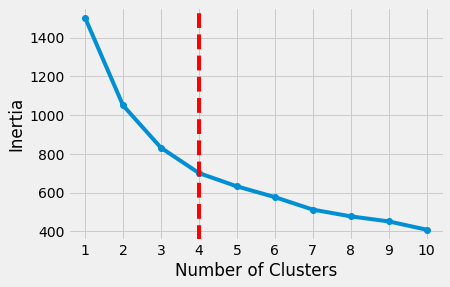

In [36]:
plt.style.use ("fivethirtyeight")
plt.plot (range (1,11), List , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
# axvline = ax vertical line
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

### Silhouette method

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [38]:
silhouette_coefficients

[0.28735668921406704,
 0.28329575683463126,
 0.303676957667828,
 0.21799590052841472,
 0.2235914006755472,
 0.24325950330001792,
 0.21811049382568184,
 0.18772966709758224,
 0.20017689295776037]

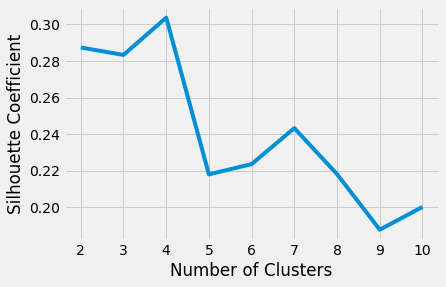

In [39]:
# Plotting the results:
plt.style.use ("fivethirtyeight")
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.show ()

### Applying KMeans Clustering w/ 3 & 4 clusters

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(df1)

centroids = kmeans.cluster_centers_
print (centroids)

labels = kmeans.labels_
print (labels)

[[5.41351852e+01 3.32573981e+01 6.32157407e+00 4.55385731e+01
  6.38113889e+03 9.20411111e+00 6.65666667e+01 3.51981481e+00
  3.02725926e+03]
 [5.04285714e+00 5.55285714e+01 9.37380952e+00 4.72095238e+01
  4.75714286e+04 2.76814286e+00 8.04571429e+01 1.77761905e+00
  4.60857143e+04]
 [5.00000000e+00 9.23333333e+01 6.35333333e+00 6.47666667e+01
  9.30000000e+04 5.51666667e+00 8.06000000e+01 1.88333333e+00
  8.77000000e+04]
 [1.21028571e+01 5.22942857e+01 6.84514286e+00 4.93371429e+01
  2.56000000e+04 6.59545714e+00 7.60628571e+01 1.97685714e+00
  1.73477143e+04]]
[0 0 0 0 3 3 0 1 1 0 3 3 0 3 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 3 0 0 0
 0 0 0 0 3 3 3 1 0 0 0 0 3 0 3 0 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 1 0 0 0 0 1
 3 1 0 1 0 3 0 0 1 0 0 3 0 0 0 3 3 2 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1
 3 0 0 2 3 0 0 0 0 0 3 3 2 3 3 0 0 3 0 0 3 0 1 3 3 0 0 3 3 0 0 0 0 1 1 0 0
 0 0 0 0 0 3 0 0 0 1 1 1 3 0 0 3 0 0 0]


In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 4)
# kmeans = kmeans.fit(df1)

# centroids = kmeans.cluster_centers_
# print (centroids)

# labels = kmeans.labels_
# print (labels)

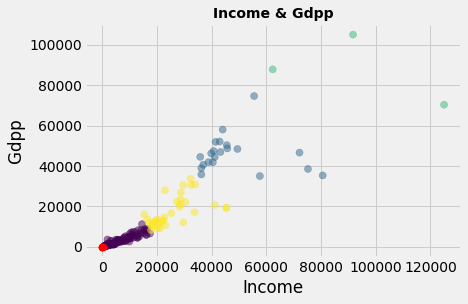

In [43]:
plt.scatter (df1["Income"] , df1["Gdpp"] , c = kmeans.labels_.astype (float), s = 50, alpha = 0.5)
plt.scatter (centroids [:, 0], centroids [:, 1], c = "red", s = 50)
plt.title ("Income & Gdpp" , weight = "bold" , color = "black" , fontsize = 14)
plt.xlabel ("Income"  , color = "black")
plt.ylabel ("Gdpp" , color = "black")
plt.grid (True)
plt.show ()

In [44]:
df2 = df1.copy()
df2['labels'] = kmeans.labels_
df2

,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,Gdpp,labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [45]:
df2.labels.value_counts()

0    108
3     35
1     21
2      3
Name: labels, dtype: int64

In [46]:
df.loc[:, 'Cluster'] = kmeans.labels_

In [47]:
df.head()

,Country,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,Gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [50]:
df_filtered = df.loc[df['Cluster'] == 2]

In [51]:
df_filtered

,Country,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,Gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,2
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800,2
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,2


### Evaluation Cluster


In [52]:
k_means = KMeans(n_clusters = 4)

model = k_means.fit(scaled_features)
model

y_hat = k_means.predict(scaled_features)

In [53]:
from sklearn import metrics

print ("Davies-Bouldin score is :" , metrics.davies_bouldin_score(scaled_features, labels))

Davies-Bouldin score is : 1.6850073104988583


# DBScan

In [54]:
from sklearn.cluster import DBSCAN


In [55]:
from itertools import product

eps_values = np.arange(8, 12.75, 0.25)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples))

In [59]:
from sklearn.metrics import silhouette_score

no_of_cluster = []
sil_score = []

for p in DBSCAN_params:
  DBS_clustering = DBSCAN(eps =p[0], min_samples=p[1]).fit(scaled_features)
  no_of_cluster.append(len(np.unique(DBS_clustering.labels_)))
  sil_score.append((silhouette_score(scaled_features, DBS_clustering.labels_)))

ValueError: ignored

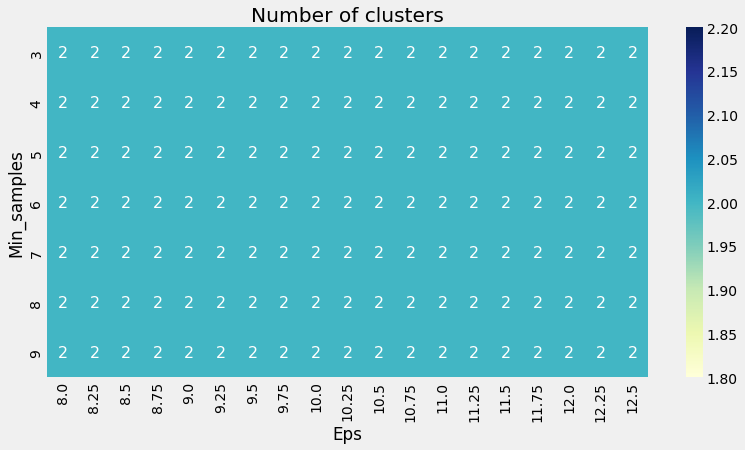

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_cluster
 
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
 
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

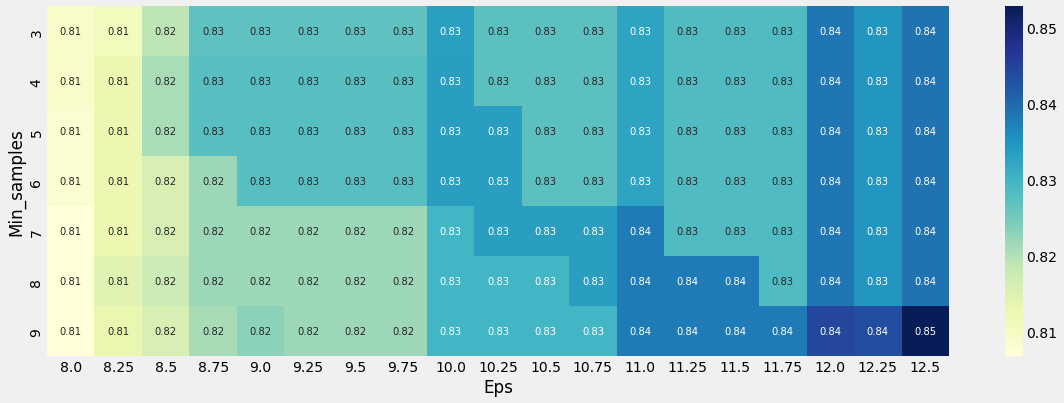

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
 
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
 
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples = 4).fit(df1)

DBSCAN_clustered = df1.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clustered.head()

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,-1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,-1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,-1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,-1


In [ ]:
DBSCAN_clustered.Cluster.value_counts()

-1    8636
Name: Cluster, dtype: int64

In [ ]:
type(scaled_features)

numpy.ndarray

In [ ]:
df = pd.DataFrame(scaled_features, columns = df1.columns)

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples = 4).fit(df1)

DBSCAN_clustered = df1.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clustered.Cluster.value_counts()

-1    8636
Name: Cluster, dtype: int64

In [ ]:
DBSCAN_clustered.head()

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,-1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,-1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,-1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,-1


In [ ]:
from sklearn import metrics

print("Davies-Bouldin score is: ", metrics.davies_bouldin_score(scaled_features, DBS_clustering.labels_))

ValueError: ignored